# Import packages:

In [1]:
import TESS_Localize as tl
import astropy.units as u
import lightkurve as lk

# Modes of interest and Target Pixel File setup:

In [2]:
low_frequency_list = [9.51112996, 19.02225993, 28.53338989, 38.04451986, 47.55564982, 57.06677979, 66.57790975, 76.08903972]

In [3]:
high_frequency_list = [500.559, 506.057, 642.255, 740.266, 884.017, 889.556, 957.817, 963.28, 969.013, 1028.729, 1034.356, 1107.713, 1212.297, 1217.872, 1223.429]

In [4]:
search_result = lk.search_targetpixelfile('TIC117070953')
tpf = search_result.download(quality_bitmask='default')

C:\Users\higgi\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


# Using TESS_Localize:

* Used in this example to show that two set of signals found in the pipeline aperture can be attributed to entirely different sources

## Examine PCA:

In [5]:
low_pca = tl.PCA(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 5)

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [6]:
high_pca = tl.PCA(targetpixelfile=tpf, frequencies=high_frequency_list, frequnit=u.uHz, principal_components = 5)

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\higgi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


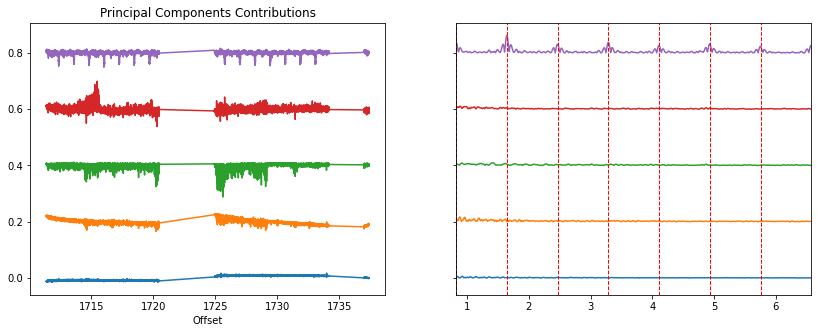

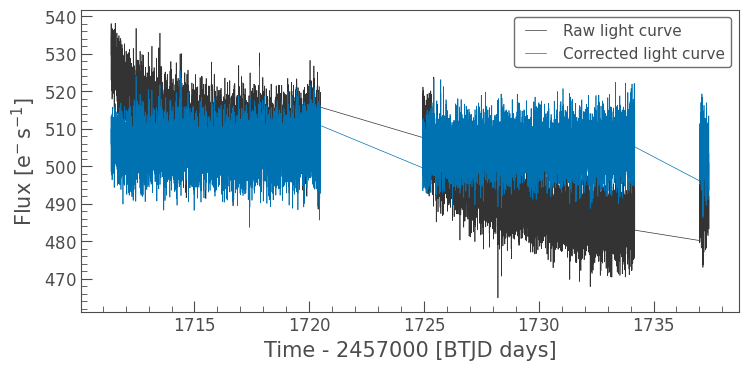

In [7]:
low_pca.plot_pca()

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


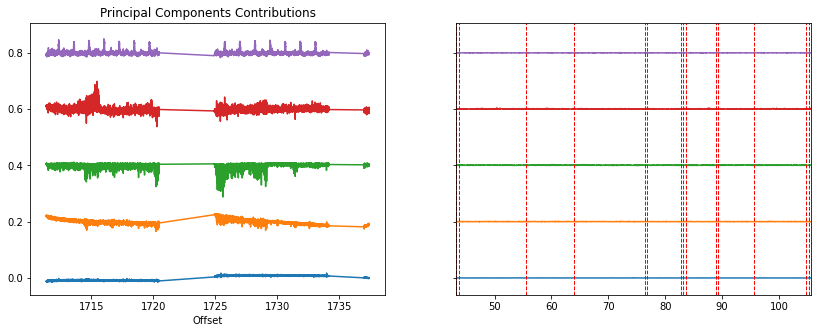

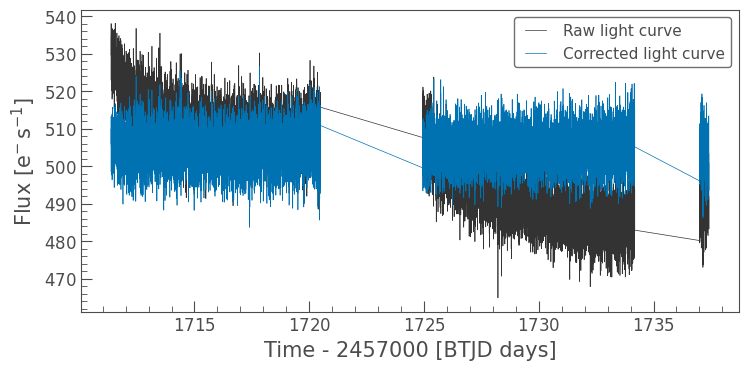

In [8]:
high_pca.plot_pca()

### From these plots we can see power at our frequencies is being removed when the number of principal components are greater than 4.

* If you are unsure of how many principal components to remove in the localization, you can use .autopca. This will provide an estimate in an attempt to ensure no signal of interest is removed in the PCA.

In [9]:
low_pca.autopca

0

In [10]:
high_pca.autopca

5

## Localizing the signal

In [11]:
low = tl.Localize(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 0)

TypeError: leastsq() got an unexpected keyword argument 'nan_policy'

In [ ]:
high = tl.Localize(targetpixelfile=tpf, frequencies=high_frequency_list, frequnit=u.uHz, principal_components = 'auto')

In [ ]:
low.info()

In [ ]:
high.info()

## SNR plots for the frequencies with the greatest signal

In [ ]:
low.plot(frequencylist_index=2,method='snr')

In [ ]:
high.plot(frequencylist_index=4,method='snr')

## Lightcurve Plots for pixel with the highest signal

In [ ]:
low.plot_lc()

In [ ]:
high.plot_lc()

In [ ]:
low_n = tl.Localize(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 0,mask=low.maxsignal_aperture)

In [ ]:
low_n.info()